In this notebook, we will replicate what was found in Rinder et al. study.

Let's load the data and preprocess it. [Link](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE165623)

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import GEOparse
from scipy.io import mmread
import matplotlib
from tqdm import tqdm

Load Data

In [3]:
adata_45 = sc.read_10x_mtx(
    "GSM5047045/", 
    var_names="gene_symbols", 
    cache=True 
)
adata_45.obs["tissue"] = "skin"
adata_45.raw = adata_45
clonotypes = pd.read_csv("GSM5047045/clonotypes.csv.gz")
cell_clonotype = pd.read_csv("GSM5047045/filtered_contig_annotations.csv.gz")
filtered_tcr = cell_clonotype[cell_clonotype['productive'] == True]
# barcode_to_clonotype = filtered_tcr.groupby('barcode')['contig_id'].first().reset_index()
TCR_list = []
for i in tqdm(adata_45.obs.index):
    clonetype_barcode = filtered_tcr[filtered_tcr['barcode']==i]['raw_clonotype_id'].to_list()
    if len(clonetype_barcode) > 0:
        TCR_list.append(clonetype_barcode[0])
    else:
        TCR_list.append(None)
adata_45.obs['clonotype_id'] = TCR_list


adata_46 = sc.read_10x_mtx(
    "GSM5047046/", 
    var_names="gene_symbols", 
    cache=True 
)
adata_46.obs["tissue"] = "LN"
adata_46.raw = adata_46
clonotypes = pd.read_csv("GSM5047046/clonotypes.csv.gz")
cell_clonotype = pd.read_csv("GSM5047046/filtered_contig_annotations.csv.gz")
filtered_tcr = cell_clonotype[cell_clonotype['productive'] == True]
# barcode_to_clonotype = filtered_tcr.groupby('barcode')['raw_clonotype_id'].first().reset_index()
TCR_list = []
for i in tqdm(adata_46.obs.index):
    clonetype_barcode = filtered_tcr[filtered_tcr['barcode']==i]['raw_clonotype_id'].to_list()
    if len(clonetype_barcode) > 0:
        TCR_list.append(clonetype_barcode[0])
    else:
        TCR_list.append(None)
adata_46.obs['clonotype_id'] = TCR_list

adata_47 = sc.read_10x_mtx(
    "GSM5047047/", 
    var_names="gene_symbols", 
    cache=True 
)
adata_47.obs["tissue"] = "PBMC"
adata_47.raw = adata_47
clonotypes = pd.read_csv("GSM5047047/clonotypes.csv.gz")
cell_clonotype = pd.read_csv("GSM5047047/filtered_contig_annotations.csv.gz")
filtered_tcr = cell_clonotype[cell_clonotype['productive'] == True]
# barcode_to_clonotype = filtered_tcr.groupby('barcode')['raw_clonotype_id'].first().reset_index()
TCR_list = []
for i in tqdm(adata_47.obs.index):
    clonetype_barcode = filtered_tcr[filtered_tcr['barcode']==i]['raw_clonotype_id'].to_list()
    if len(clonetype_barcode) > 0:
        TCR_list.append(clonetype_barcode[0])
    else:
        TCR_list.append(None)
adata_47.obs['clonotype_id'] = TCR_list

# 45 => SKIN
# 46 => LN
# 47 => PBMC

# adata = adata_45.concatenate(adata_46, adata_47)

# print(adata)

100%|██████████| 4748/4748 [00:06<00:00, 777.02it/s] 


Do the preprocessing steps

Filter based on the expression 

In [4]:
adata_45.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC233755.2,ENSG00000277856,Gene Expression
AC233755.1,ENSG00000275063,Gene Expression
AC240274.1,ENSG00000271254,Gene Expression
AC213203.1,ENSG00000277475,Gene Expression


In [5]:
adata_45.var["mt"] = adata_45.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_45, qc_vars=["mt"], percent_top=None, inplace=True)

In [6]:
adata_45.obs

,tissue,clonotype_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGCACTTACGA-1,skin,None,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564
AAACCTGCATGTAGTC-1,skin,clonotype5,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101
AAACCTGGTAATCGTC-1,skin,clonotype3,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723
AAACCTGGTACAGTTC-1,skin,None,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750
AAACCTGGTCCGTTAA-1,skin,None,474,6.163315,1279.0,7.154615,550.0,6.311735,43.002346
...,...,...,...,...,...,...,...,...,...
TTTGTCATCTCTAAGG-1,skin,None,50,3.931826,1353.0,7.210818,1315.0,7.182352,97.191429
TTTGTCATCTGATTCT-1,skin,clonotype1,1756,7.471363,5113.0,8.539737,28.0,3.367296,0.547624
TTTGTCATCTGTCTCG-1,skin,None,542,6.297109,1447.0,7.277938,720.0,6.580639,49.758121
TTTGTCATCTTATCTG-1,skin,None,1637,7.401231,5042.0,8.525757,146.0,4.990433,2.895676


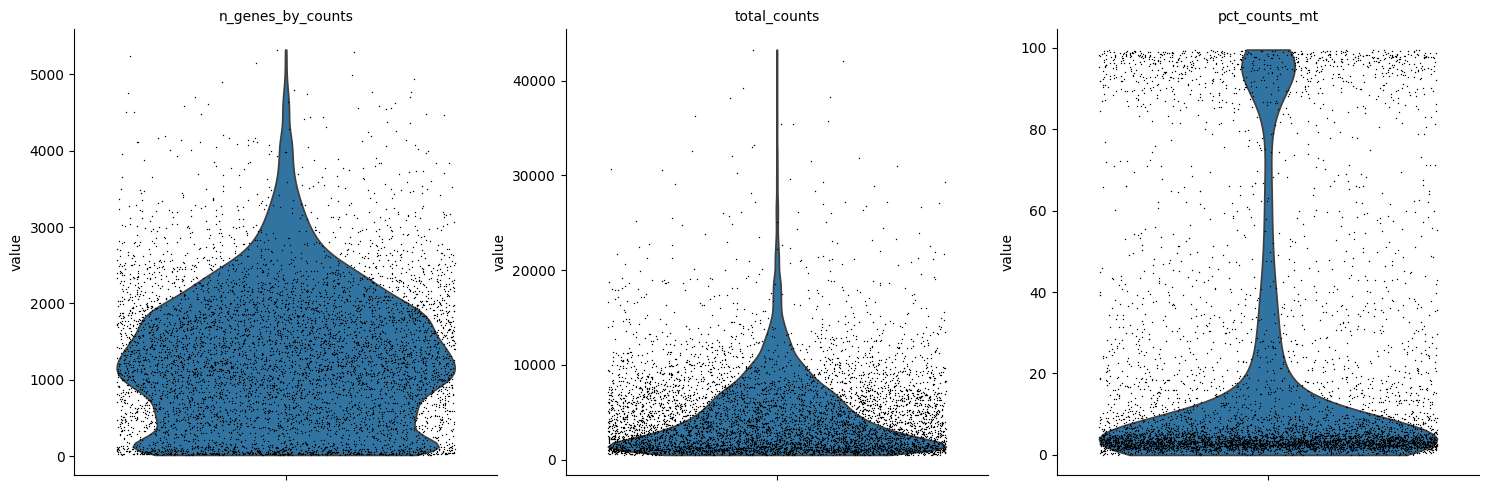

In [7]:
sc.pl.violin(adata_45, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

In [8]:
adata_45

AnnData object with n_obs × n_vars = 6327 × 33538
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [9]:
# make sure it is percentage
adata_45.obs.pct_counts_mt.max()

np.float32(99.58377)

Based on the paper the thresholds are 200 to 4000 and less than 12%

In [10]:
adata_45 = adata_45[(adata_45.obs.n_genes_by_counts > 200).to_list() and (adata_45.obs.n_genes_by_counts < 4000).to_list(), :]
adata_45 = adata_45[(adata_45.obs.pct_counts_mt < 12).to_list(), :]

In [11]:
adata_45

View of AnnData object with n_obs × n_vars = 4356 × 33538
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

Normalization and log transformation

In [12]:
sc.pp.normalize_total(adata_45, target_sum=1e4)

/home/arsalan/Desktop/HW/Genomic/Project/venv/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
print(f"adata.X: {adata_45.X.max()}")

adata.X: 2540.208251953125


In [14]:
sc.pp.log1p(adata_45)

In [15]:
print(f"adata.X: {adata_45.X.max()}")

adata.X: 7.840394973754883


In [16]:
adata_45.var

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,False,1,0.000158,0.000158,99.984195,1.0,0.693147
FAM138A,ENSG00000237613,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,False,1,0.000158,0.000158,99.984195,1.0,0.693147
AL627309.3,ENSG00000239945,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC233755.1,ENSG00000275063,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC240274.1,ENSG00000271254,Gene Expression,False,15,0.002371,0.002368,99.762921,15.0,2.772589
AC213203.1,ENSG00000277475,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000


In [17]:
sc.pp.highly_variable_genes(adata_45, n_top_genes=2000)

In [18]:
# adata_45 = adata_45[:, adata_45.var.highly_variable]

Do all the steps above but now for the other two samples

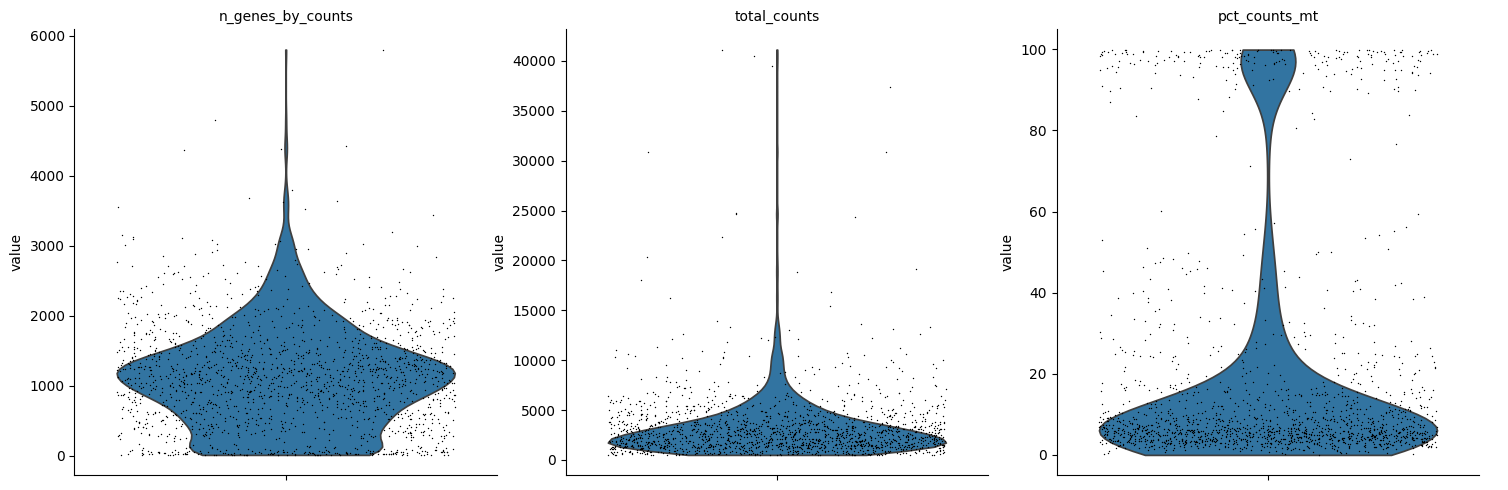

/home/arsalan/Desktop/HW/Genomic/Project/venv/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


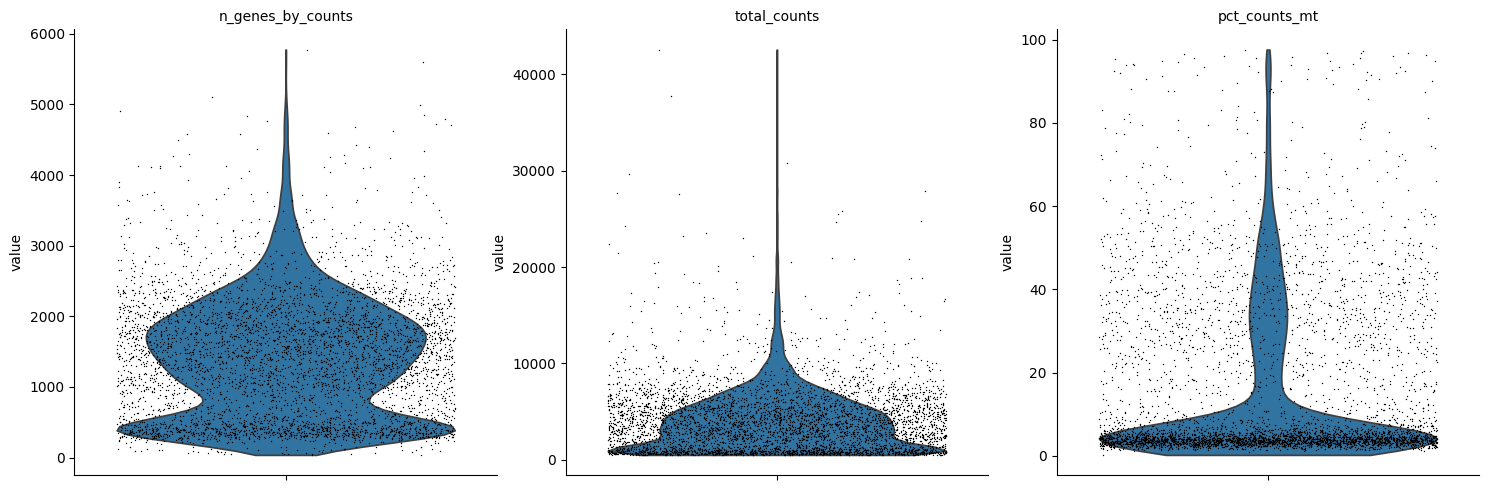

/home/arsalan/Desktop/HW/Genomic/Project/venv/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [19]:
adata_46.var["mt"] = adata_46.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_46, qc_vars=["mt"], percent_top=None, inplace=True)
sc.pl.violin(adata_46, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)
adata_46 = adata_46[(adata_46.obs.n_genes_by_counts > 200).to_list() and (adata_46.obs.n_genes_by_counts < 4000).to_list(), :]
adata_46 = adata_46[(adata_46.obs.pct_counts_mt < 12).to_list(), :]
sc.pp.normalize_total(adata_46, target_sum=1e4)
sc.pp.log1p(adata_46)
sc.pp.highly_variable_genes(adata_46, n_top_genes=2000)
# adata_46 = adata_46[:, adata_46.var.highly_variable]

adata_47.var["mt"] = adata_47.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_47, qc_vars=["mt"], percent_top=None, inplace=True)
sc.pl.violin(adata_47, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)
adata_47 = adata_47[(adata_47.obs.n_genes_by_counts > 200).to_list() and (adata_47.obs.n_genes_by_counts < 4000).to_list(), :]
adata_47 = adata_47[(adata_47.obs.pct_counts_mt < 12).to_list(), :]
sc.pp.normalize_total(adata_47, target_sum=1e4)
sc.pp.log1p(adata_47)
sc.pp.highly_variable_genes(adata_47, n_top_genes=2000)
# adata_47 = adata_47[:, adata_47.var.highly_variable]

In [20]:
# Number of remaining cell in each sample after filtering
print(adata_45)
print(adata_46)
print(adata_47)

AnnData object with n_obs × n_vars = 4356 × 33538
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
AnnData object with n_obs × n_vars = 1144 × 33538
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
AnnData object with n_obs × n_vars = 3

In [21]:
np.sum(adata_45.var.highly_variable.to_list() or adata_46.var.highly_variable.to_list() or adata_47.var.highly_variable.to_list())

# Apparentely, the boolean list can not be or-ed together like this! So I'll use set based on the names instead
print([True, False] or [False, True])
print(set(["A", "B"]).union(["B", "C"]))

[True, False]
{'C', 'A', 'B'}


In [22]:
highly_variable_45 = adata_45.var[adata_45.var.highly_variable].index
highly_variable_46 = adata_46.var[adata_46.var.highly_variable].index
highly_variable_47 = adata_47.var[adata_47.var.highly_variable].index

selected_genes = set(highly_variable_45).union(highly_variable_46).union(highly_variable_47)
print(f"Number of overlapping highly variable genes: {len(selected_genes)}")

Number of overlapping highly variable genes: 4771


In [23]:
# merge the datasets
adata = adata_45.concatenate(adata_46, adata_47)

/tmp/ipykernel_44945/3157664021.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_45.concatenate(adata_46, adata_47)


In [24]:
adata

AnnData object with n_obs × n_vars = 8733 × 33538
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'

In [25]:
adata.var_names.isin(selected_genes).sum()

np.int64(4771)

In [26]:
adata = adata[:, adata.var_names.isin(selected_genes)]

In [27]:
adata

View of AnnData object with n_obs × n_vars = 8733 × 4771
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'

After merging 4771 genes was selected.

Now this is a direct quote from the paper which will be done in sections below:

"Brieﬂy, gene
expression counts were log-normalized and 2,000 variable
features were selected individually for each sample, and used to
ﬁnd integration anchors, and for principal component analysis.
Based on explained variance by each principal component
(elbow plot), we selected the ﬁrst 22 principal components as
input for dimension reduction and clustering using the Louvain
algorithm at a resolution of 0.6. Clusters were visualized in two-
dimensional space by Uniform Manifold Approximation and
Projection (UMAP)."

In [28]:
sc.tl.pca(adata)

/home/arsalan/Desktop/HW/Genomic/Project/venv/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [29]:
# We can see PCA data is added to adata
adata

AnnData object with n_obs × n_vars = 8733 × 4771
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

PCA Visualization

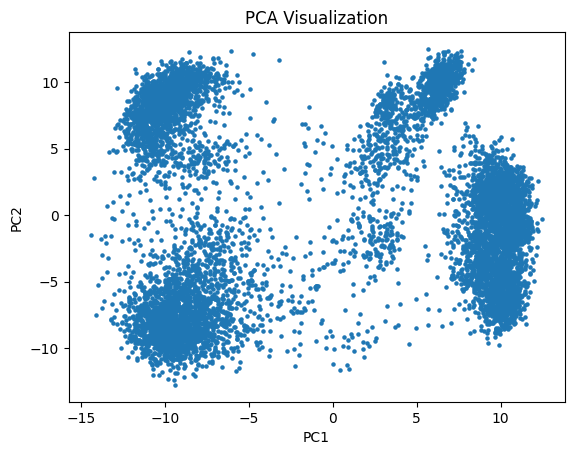

In [30]:
plt.scatter(adata.obsm['X_pca'][:, 0], adata.obsm['X_pca'][:, 1], s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

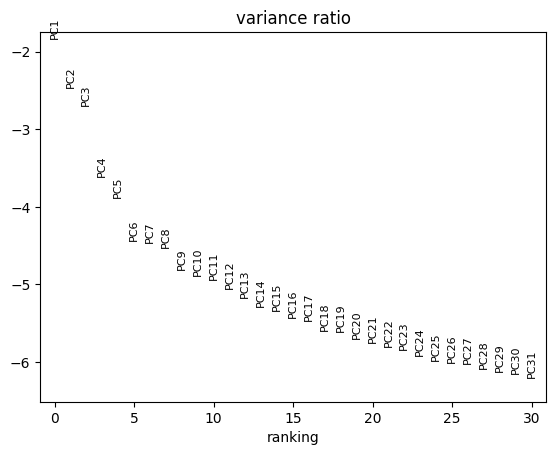

In [31]:
# See if we can find the elbow
sc.pl.pca_variance_ratio(adata, log=True)

I don't think the elbow point is 22, but for consistency as paper says we select tio 22 PCs.

In [32]:
adata

AnnData object with n_obs × n_vars = 8733 × 4771
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [33]:
sc.pp.neighbors(adata, n_pcs=22, n_neighbors=15)

/home/arsalan/Desktop/HW/Genomic/Project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
adata

AnnData object with n_obs × n_vars = 8733 × 4771
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [35]:
sc.tl.umap(adata)

In [36]:
adata

AnnData object with n_obs × n_vars = 8733 × 4771
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'conne

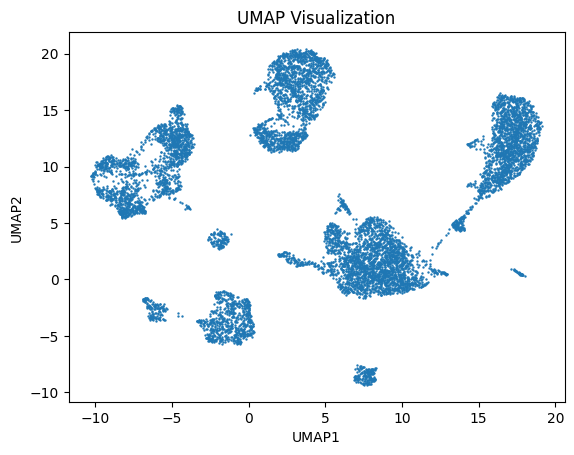

In [37]:
plt.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], s=0.5)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Visualization')
plt.show()

In [38]:
adata.obs

,tissue,clonotype_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,batch
AAACCTGCACTTACGA-1-0,skin,NaN,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564,0
AAACCTGCATGTAGTC-1-0,skin,clonotype5,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101,0
AAACCTGGTAATCGTC-1-0,skin,clonotype3,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723,0
AAACCTGGTACAGTTC-1-0,skin,NaN,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750,0
AAACCTGGTGATGCCC-1-0,skin,clonotype1,2394,7.781139,9508.0,9.159994,208.0,5.342334,2.187631,0
...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTGCCC-1-2,PBMC,NaN,1352,7.210080,3310.0,8.105005,132.0,4.890349,3.987916,2
TTTGTCAGTTCCGTCT-1-2,PBMC,clonotype713,1774,7.481556,4778.0,8.471987,129.0,4.867535,2.699874,2
TTTGTCATCGCATGAT-1-2,PBMC,NaN,1715,7.447751,4288.0,8.363809,445.0,6.100319,10.377798,2
TTTGTCATCGGGAGTA-1-2,PBMC,NaN,1496,7.311218,3798.0,8.242493,144.0,4.976734,3.791469,2


In [39]:
sc.tl.louvain(adata, resolution=0.6)

In [40]:
adata.obs

,tissue,clonotype_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,batch,louvain
AAACCTGCACTTACGA-1-0,skin,NaN,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564,0,4
AAACCTGCATGTAGTC-1-0,skin,clonotype5,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101,0,2
AAACCTGGTAATCGTC-1-0,skin,clonotype3,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723,0,2
AAACCTGGTACAGTTC-1-0,skin,NaN,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750,0,0
AAACCTGGTGATGCCC-1-0,skin,clonotype1,2394,7.781139,9508.0,9.159994,208.0,5.342334,2.187631,0,2
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTGCCC-1-2,PBMC,NaN,1352,7.210080,3310.0,8.105005,132.0,4.890349,3.987916,2,1
TTTGTCAGTTCCGTCT-1-2,PBMC,clonotype713,1774,7.481556,4778.0,8.471987,129.0,4.867535,2.699874,2,3
TTTGTCATCGCATGAT-1-2,PBMC,NaN,1715,7.447751,4288.0,8.363809,445.0,6.100319,10.377798,2,1
TTTGTCATCGGGAGTA-1-2,PBMC,NaN,1496,7.311218,3798.0,8.242493,144.0,4.976734,3.791469,2,1


In [41]:
adata

AnnData object with n_obs × n_vars = 8733 × 4771
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'louvain'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    uns: 'pca', 'neighbors', 'umap', 'louvain'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obs

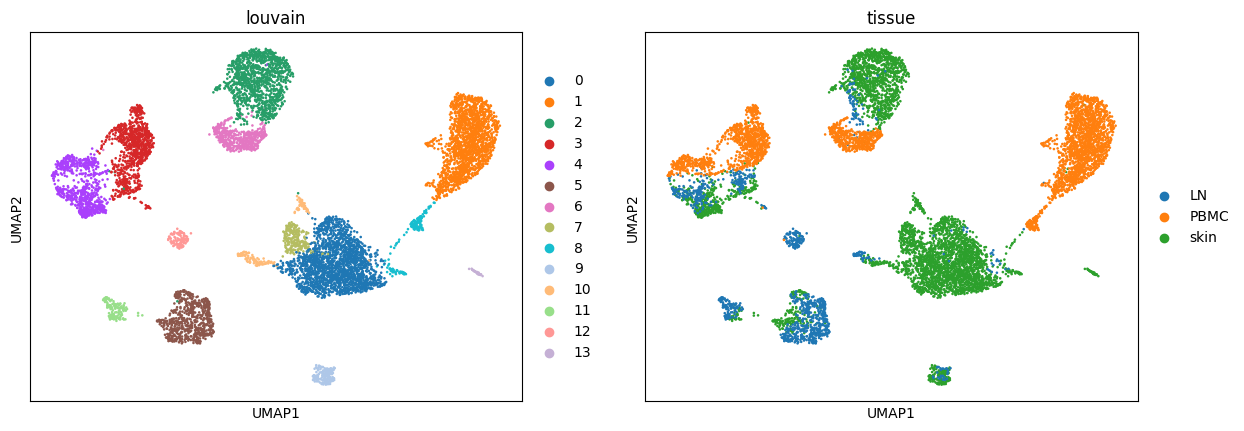

In [42]:
sc.pl.umap(adata, color=["louvain", "tissue"])

In [43]:
# list all the genes
for i in adata.var_names.to_list():
    print(i)

AL627309.1
FAM41C
KLHL17
ISG15
TNFRSF18
TNFRSF4
C1QTNF12
ACAP3
DVL1
MXRA8
AL391244.3
ATAD3C
MIB2
MMP23B
FO704657.1
CDK11A
PRKCZ
PLCH2
MMEL1
ARHGEF16
MEGF6
NPHP4
RNF207
ICMT
TNFRSF25
UTS2
TNFRSF9
AL034417.3
ERRFI1
SLC45A1
SLC25A33
RBP7
PGD
AL139423.1
FBXO2
FBXO44
DRAXIN
C1orf167
MTHFR
DHRS3
AC254633.1
PDPN
TMEM51
AL031283.1
AL121992.3
DDI2
SLC25A34-AS1
LINC01772
NBPF1
BX284668.6
PADI4
ARHGEF10L
IFFO2
AKR7A3
PLA2G2A
PLA2G5
PLA2G2D
UBXN10-AS1
UBXN10
CDA
PINK1
NBPF3
ALPL
AL359815.1
HSPG2
C1QA
C1QC
C1QB
ID3
IFNLR1
NIPAL3
AL445686.2
RUNX3
AL031432.1
RSRP1
MAN1C1
SELENON
AL020996.1
PAQR7
STMN1
CNKSR1
UBXN11
CD52
ZNF683
DHDDS
AL512408.1
SFN
GPATCH3
SYTL1
FCN3
IFI6
EYA3
PTAFR
AL353622.1
AL353622.2
SNHG12
TINAGL1
HCRTR1
ADGRB2
AL354919.1
FAM167B
LCK
MARCKSL1
TSSK3
FAM229A
KIAA1522
AZIN2
GJA4
AC004865.2
C1orf216
TEKT2
CSF3R
GRIK3
LINC01137
LINC01685
AL139260.1
AL139260.3
MACF1
AL033527.5
MFSD2A
RLF
AL603839.3
NFYC-AS1
CITED4
SLFNL1-AS1
FOXJ3
SLC2A1
C1orf210
TIE1
CDC20
KDM4A
AL451062.1
DPH2
B4GALT

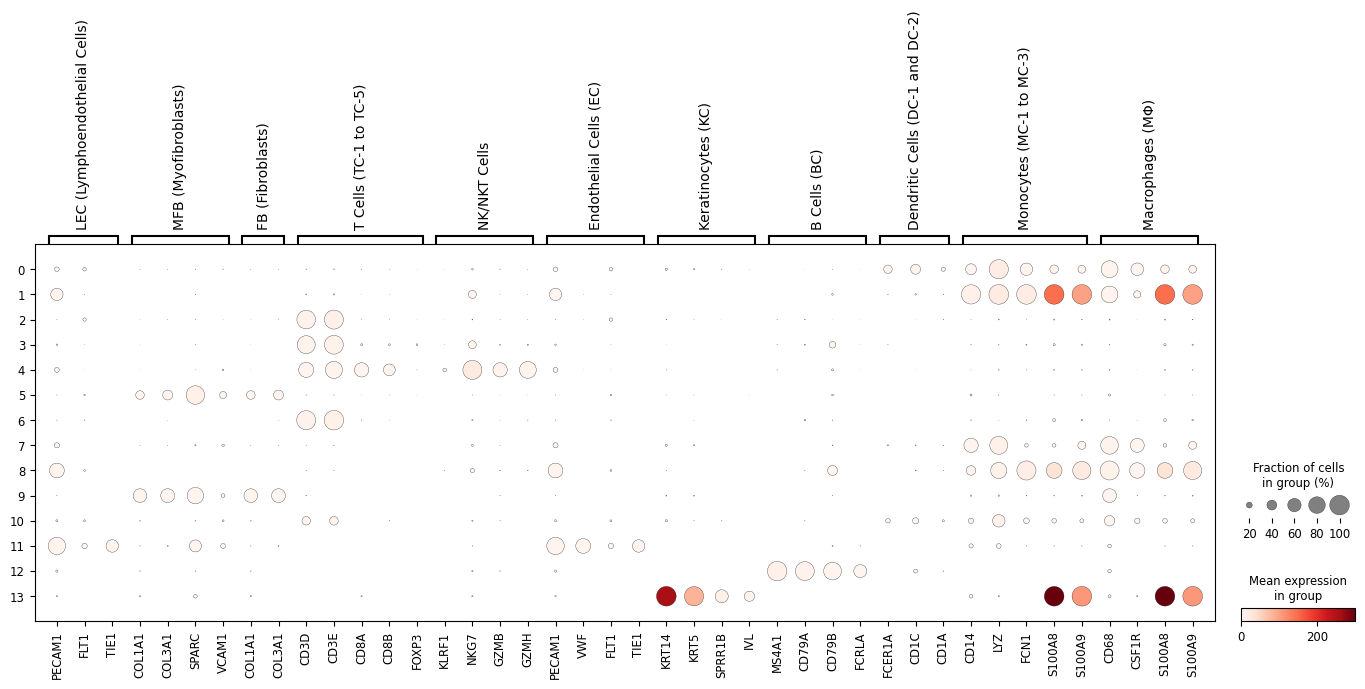

In [44]:
# marker_genes = {
#     "T Cells": ["CD8A", "CD8B", "FOXP3"],
#     "NK Cells": ["KLRF1", "NKG7", "GZMB", "GZMH"],
#     "B Cells": ["MS4A1", "CD79A", "CD79B"],
#     "Monocytes": ["LYZ", "FCN1", "S100A8", "S100A9"],
#     "Macrophages": ["S100A8", "S100A9"],
#     "Dendritic Cells": ["FCER1A", "CD1C", "CD1A"],
#     "Fibroblasts": ["COL1A1", "COL3A1"],
#     "Endothelial Cells": ["VWF", "FLT1"],
#     "Plasma Cells": ["IGHG1", "IGHG2", "IGHG3", "MZB1", "JCHAIN"],
#     "Proliferating Cells": ["MKI67", "TOP2A"],
#     "Keratinocytes": ["KRT14", "KRT5", "SPRR1B"]
# }

marker_genes = {
    "LEC (Lymphoendothelial Cells)": ["PECAM1", "FLT1", "TIE1"],
    "MFB (Myofibroblasts)": ["COL1A1", "COL3A1", "SPARC", "VCAM1"],
    "FB (Fibroblasts)": ["COL1A1", "COL3A1", "FAP"],
    "T Cells (TC-1 to TC-5)": ["CD3D", "CD3E", "CD8A", "CD8B", "FOXP3"],
    "NK/NKT Cells": ["KLRF1", "NKG7", "GZMB", "GZMH"],
    "Endothelial Cells (EC)": ["PECAM1", "VWF", "FLT1", "TIE1"],
    "Keratinocytes (KC)": ["KRT14", "KRT5", "SPRR1B", "IVL"],
    "B Cells (BC)": ["MS4A1", "CD79A", "CD79B", "FCRLA"],
    "Dendritic Cells (DC-1 and DC-2)": ["CLEC9A", "FCER1A", "CD1C", "CD1A"],
    "Monocytes (MC-1 to MC-3)": ["CD14", "LYZ", "FCN1", "S100A8", "S100A9"],
    "Macrophages (MΦ)": ["CD68", "CSF1R", "S100A8", "S100A9"],
}

# remove uncommon genes
for key in marker_genes:
    marker_genes[key] = [gene for gene in marker_genes[key] if gene in adata.var_names]

sc.pl.dotplot(adata, marker_genes, groupby="louvain")

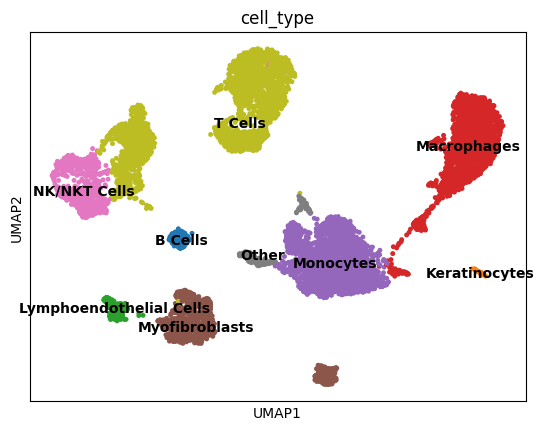

In [45]:
adata.obs["cell_type"] = adata.obs["louvain"].map({
    "0": "Monocytes",
    "1": "Macrophages",
    "2": "T Cells",
    "3": "T Cells",
    "4": "NK/NKT Cells",
    "5": "Myofibroblasts",
    "6": "T Cells",
    "7": "Monocytes",
    "8": "Macrophages",
    "9": "Myofibroblasts",
    "10": "Other",
    "11": "Lymphoendothelial Cells",
    "12": "B Cells",
    "13": "Keratinocytes",
})

# Visualize annotated UMAP
sc.pl.umap(adata, color=["cell_type"], legend_loc="on data", size=50)

Direct quote: "The corresponding cell types of clusters
were annotated by ﬁnding cluster markers with the
“FindAllMarkers” command and running the SingleR package"

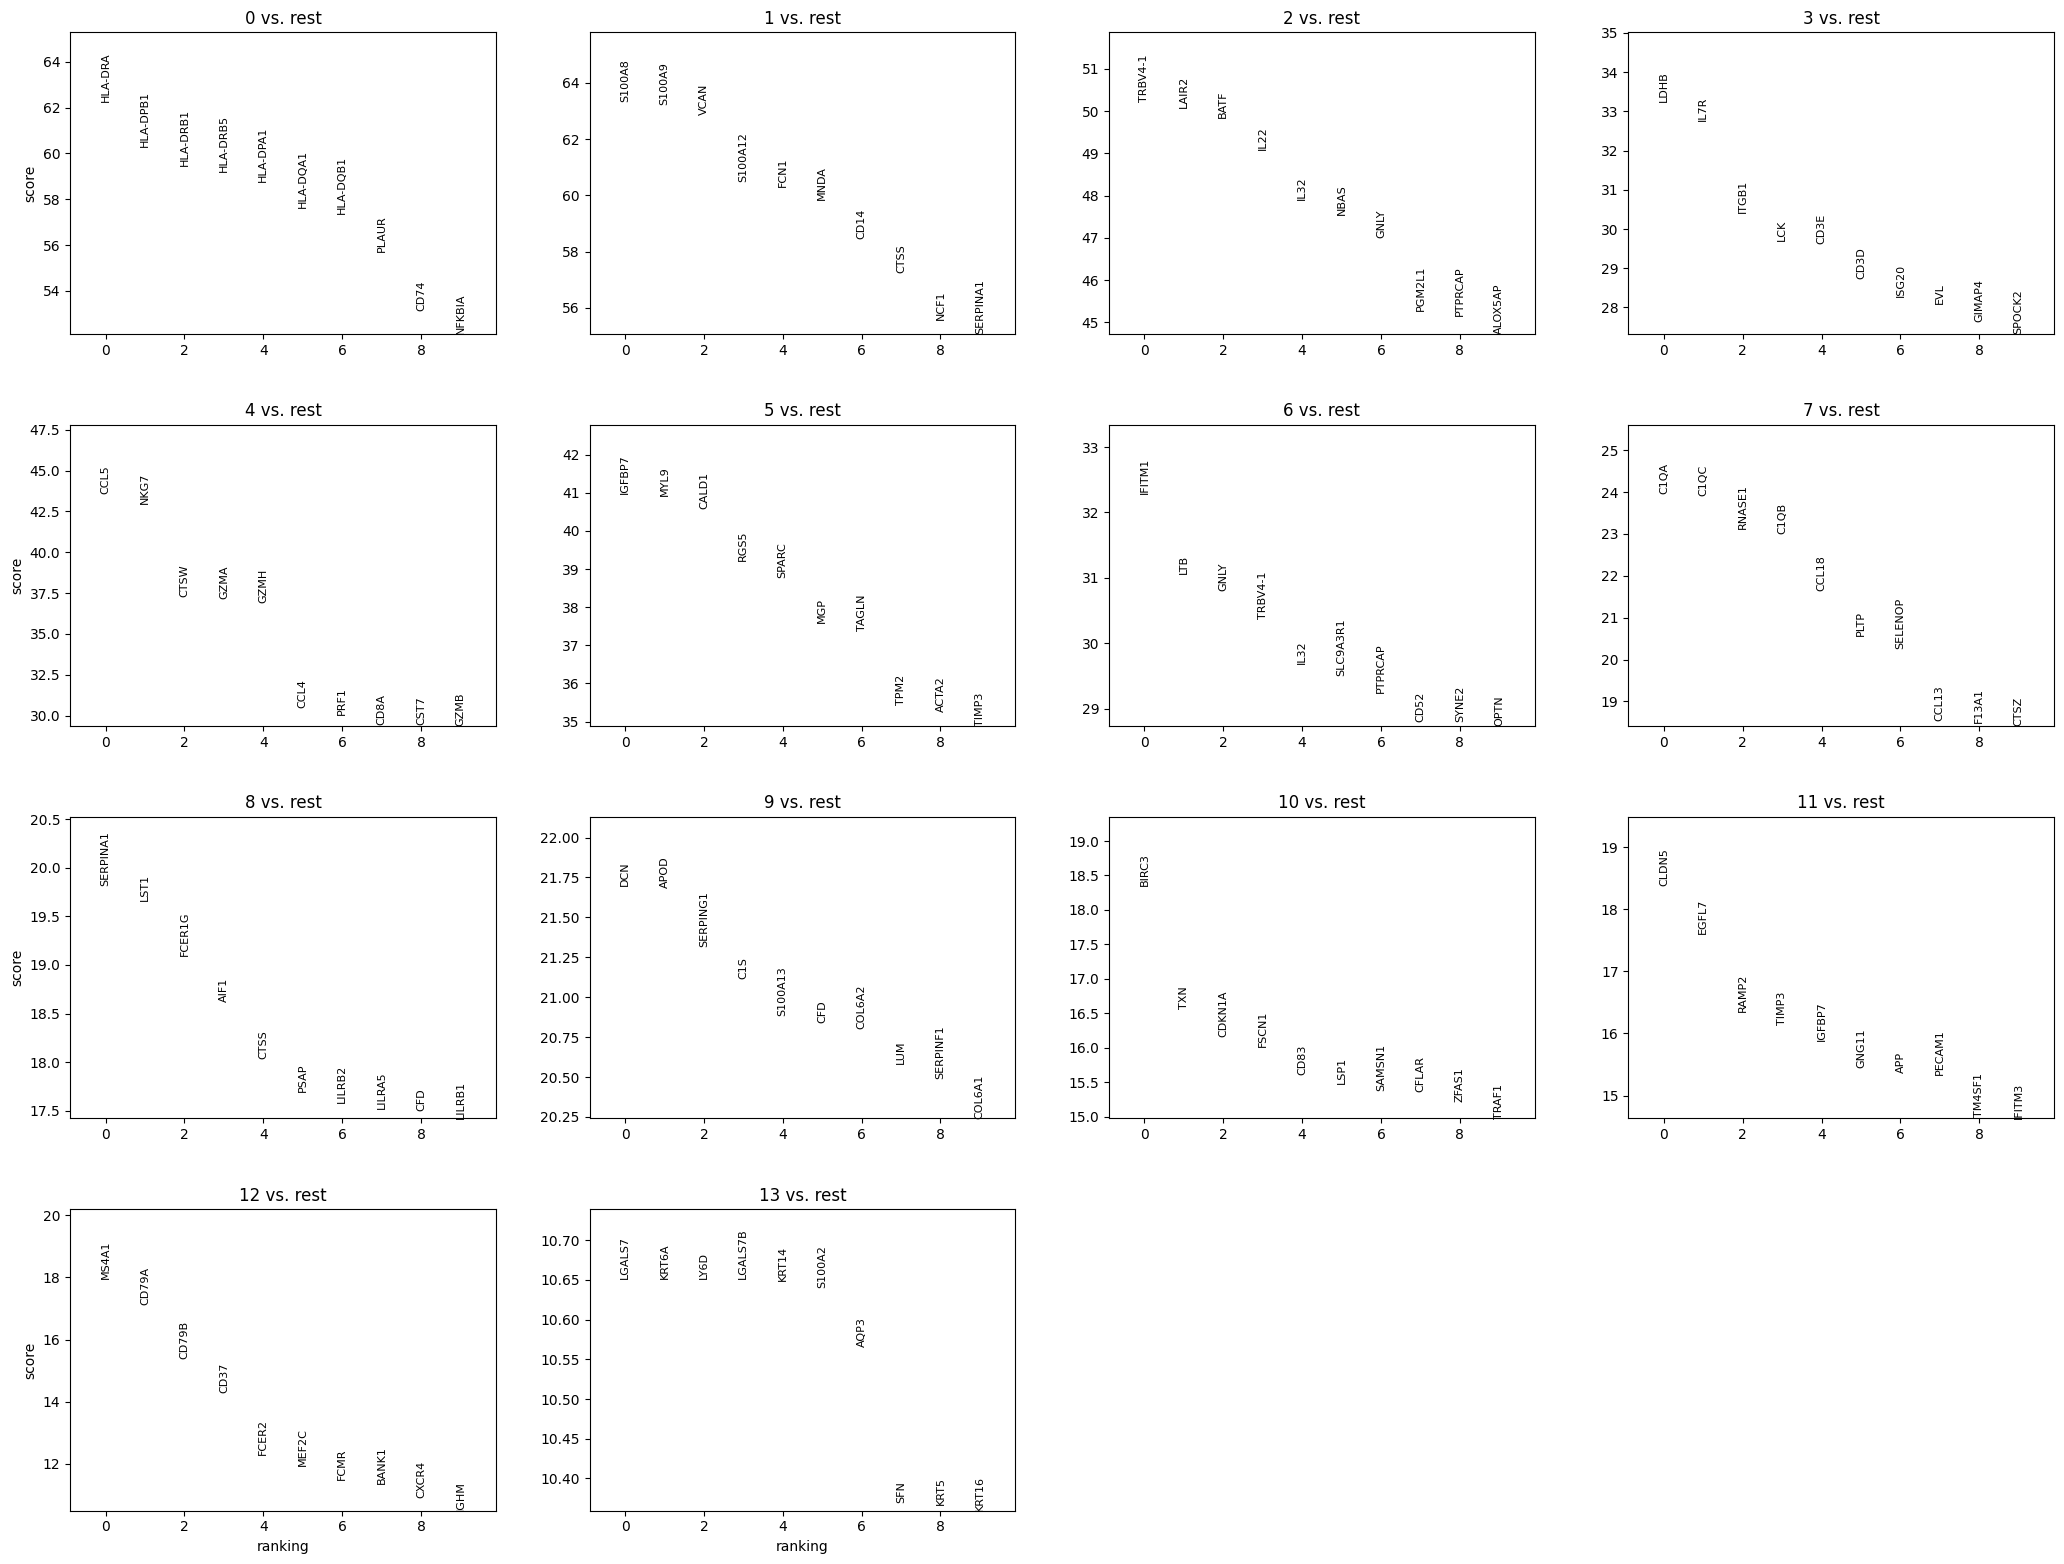

In [46]:
sc.tl.rank_genes_groups(adata, groupby="louvain", method="wilcoxon")

sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

markers = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
markers.to_csv("marker_genes.csv")

In [47]:
adata.raw

In [48]:
adata.var_names.str.upper()

Index(['AL627309.1', 'FAM41C', 'KLHL17', 'ISG15', 'TNFRSF18', 'TNFRSF4',
       'C1QTNF12', 'ACAP3', 'DVL1', 'MXRA8',
       ...
       'DIP2A', 'S100B', 'MT-ND3', 'MT-ND4L', 'MT-ND6', 'MT-CYB', 'AL592183.1',
       'AC007325.4', 'AC007325.2', 'AC233755.2'],
      dtype='object', length=4771)

In [49]:
import celltypist
import pandas as pd
from anndata import AnnData

# Prepare the input matrix for CellTypist (genes as rows, cells as columns)
expression_matrix = AnnData(
    X=adata.X.T,
    obs=pd.DataFrame(index=adata.var_names),
    var=pd.DataFrame(index=adata.obs_names)
)

model = celltypist.models.download_models('Immune_All_Low.pkl')

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json


📚 Total models in list: 52
📂 Storing models in /home/arsalan/.celltypist/data/models
💾 Downloading model [1/52]: Immune_All_Low.pkl
💾 Downloading model [2/52]: Immune_All_High.pkl
💾 Downloading model [3/52]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/52]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/52]: Adult_Human_MTG.pkl
💾 Downloading model [6/52]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [7/52]: Adult_Human_PrefrontalCortex.pkl
💾 Downloading model [8/52]: Adult_Human_Skin.pkl
💾 Downloading model [9/52]: Adult_Mouse_Gut.pkl
💾 Downloading model [10/52]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [11/52]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [12/52]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [13/52]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [14/52]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [15/52]: COVID19_Immune_Landscape.pkl
💾 Downloading model [16/52]: Cells_Adult_Breast.pkl
💾 Downloading model [17/52]: C

THE CELL BELOW WILL GENERATE ERROR. It will be addressed in the next cell.

In [50]:
# Run CellTypist
predictions = celltypist.annotate(
    adata,
    model=model,
    majority_voting=True  # Use majority voting for robust predictions
)

adata.obs['CellTypist_labels'] = predictions.predicted_labels

⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 8733 cells and 4771 genes
🔗 Matching reference genes in the model


🧬 2026 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


ValueError: Cannot set a DataFrame with multiple columns to the single column CellTypist_labels

In [51]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
AAACCTGCACTTACGA-1-0,NK cells,99,DC2
AAACCTGCATGTAGTC-1-0,Tem/Effector helper T cells,75,Regulatory T cells
AAACCTGGTAATCGTC-1-0,Regulatory T cells,16,Regulatory T cells
AAACCTGGTACAGTTC-1-0,Intestinal macrophages,57,DC2
AAACCTGGTGATGCCC-1-0,Regulatory T cells,80,Regulatory T cells
...,...,...,...
TTTGTCACATTTGCCC-1-2,Classical monocytes,2,Classical monocytes
TTTGTCAGTTCCGTCT-1-2,Type 17 helper T cells,8,Regulatory T cells
TTTGTCATCGCATGAT-1-2,Classical monocytes,10,Classical monocytes
TTTGTCATCGGGAGTA-1-2,Classical monocytes,2,Classical monocytes


In [53]:
for i in predictions.predicted_labels['majority_voting'].unique():
    print(i)

DC2
Regulatory T cells
Macrophages
Tem/Trm cytotoxic T cells
Double-positive thymocytes
CD16+ NK cells
Fibroblasts
Tcm/Naive helper T cells
Monocytes
Epithelial cells
Classical monocytes
Tem/Temra cytotoxic T cells
Endothelial cells
Migratory DCs
Plasma cells
Naive B cells
Non-classical monocytes
Tem/Effector helper T cells


In [54]:
adata.obs['CellTypist_labels'] = predictions.predicted_labels['majority_voting']

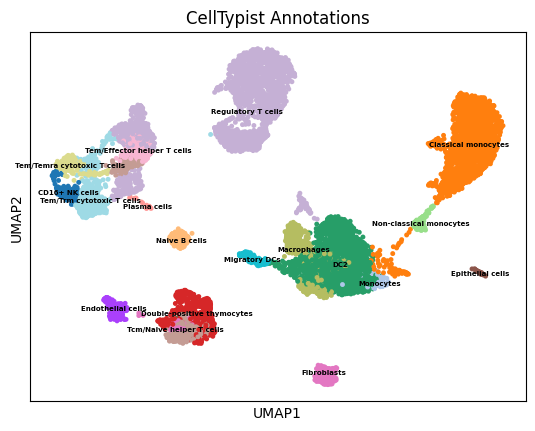

In [55]:
sc.pl.umap(adata, color=["CellTypist_labels"], legend_loc="on data", size=50, title="CellTypist Annotations",legend_fontsize=5)

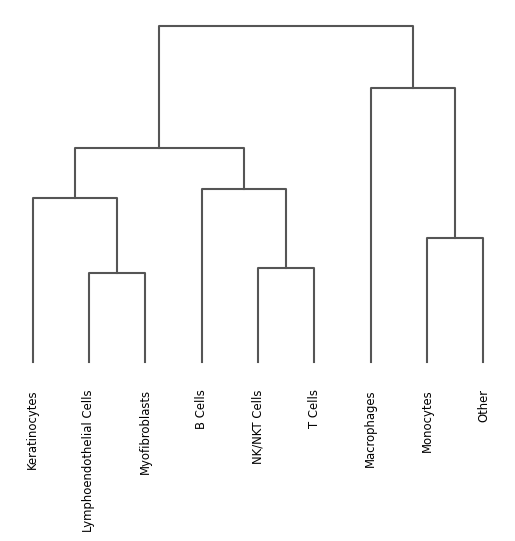

<Axes: >

In [56]:
sc.tl.dendrogram(adata, groupby="cell_type")
sc.pl.dendrogram(adata, groupby="cell_type")

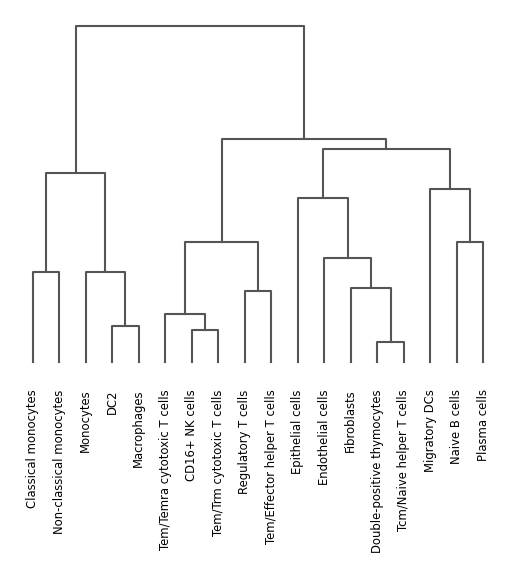

<Axes: >

In [57]:
sc.tl.dendrogram(adata, groupby="CellTypist_labels")
sc.pl.dendrogram(adata, groupby="CellTypist_labels")

Gene PTPRC is not present in the dataset.
Gene CD4 is not present in the dataset.
Gene ITGAX is not present in the dataset.


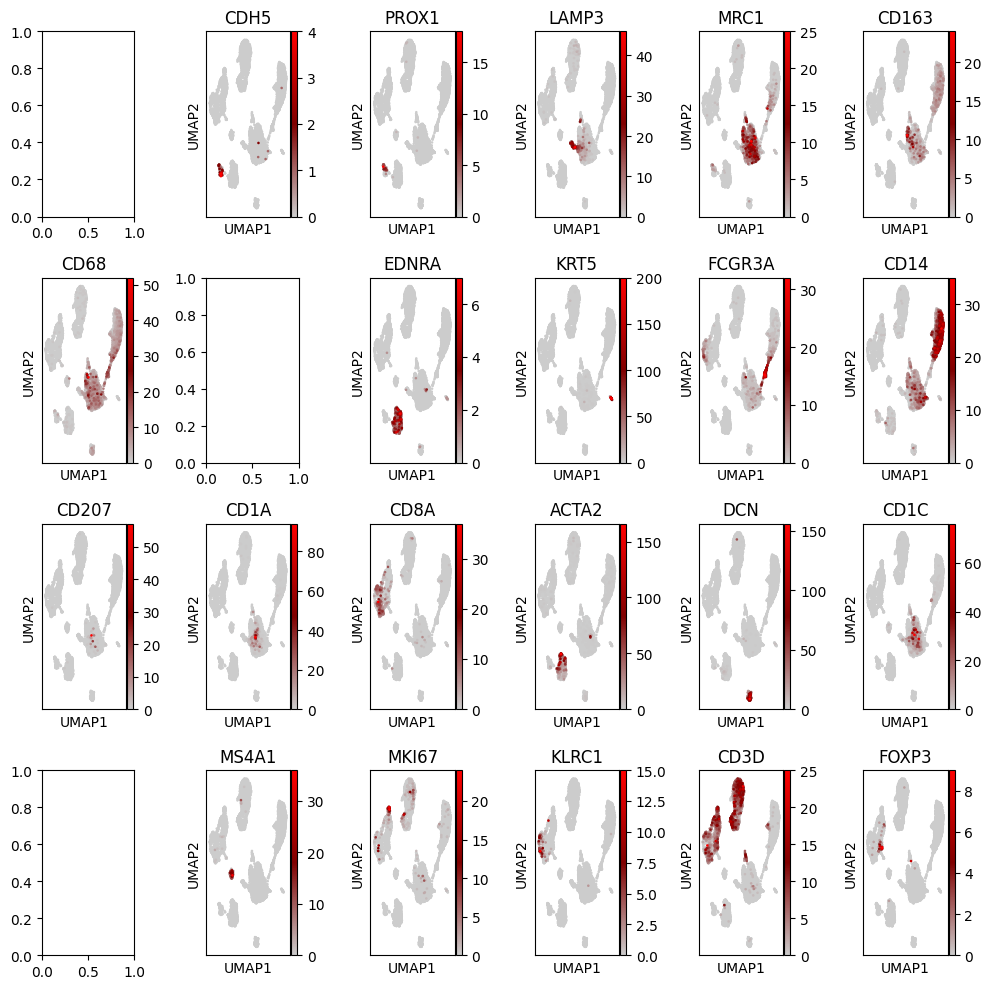

In [58]:
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'custom_rgb_cmap',
    [(0.8, 0.8, 0.8),
     (0.5, 0, 0),
     (1, 0, 0)
    ]
)

adatamarker_genes = [
    "PTPRC", "CDH5", "PROX1", "LAMP3", "MRC1", "CD163",
    "CD68", "CD4", "EDNRA", "KRT5", "FCGR3A", "CD14",
    "CD207", "CD1A", "CD8A", "ACTA2", "DCN", "CD1C",
    "ITGAX", "MS4A1", "MKI67", "KLRC1", "CD3D", "FOXP3"
]

fig, axs = plt.subplots(4, 6, figsize=(10, 10))
for gene in adatamarker_genes:
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, title=gene, cmap=custom_cmap, show=False, ax=axs.flat[adatamarker_genes.index(gene)])
        # break
    else:
        print(f"Gene {gene} is not present in the dataset.")
plt.tight_layout()
plt.show()

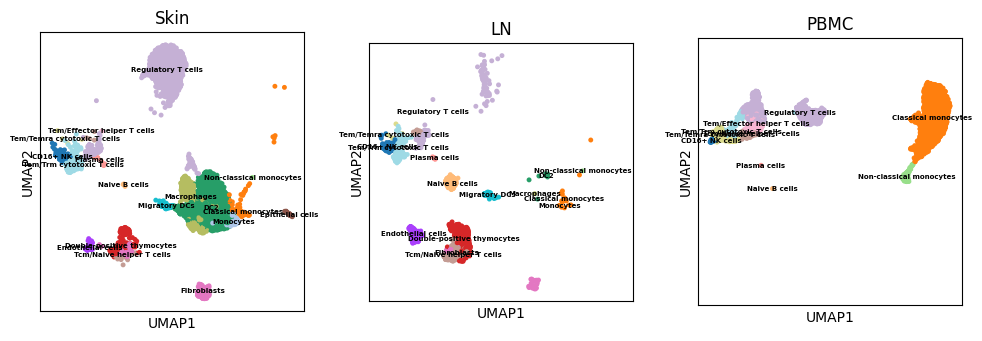

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(10, 20))
sc.pl.umap(adata[adata.obs["tissue"] == "skin",:], color=["CellTypist_labels"], legend_loc="on data", size=50, title="Skin", ax=axs[0], show=False, legend_fontsize=5)
axs[0].set_aspect('equal', adjustable='box')
sc.pl.umap(adata[adata.obs["tissue"] == "LN",:], color=["CellTypist_labels"], legend_loc="on data", size=50, title="LN", ax=axs[1], show=False, legend_fontsize=5)
axs[1].set_aspect('equal', adjustable='box')
sc.pl.umap(adata[adata.obs["tissue"] == "PBMC",:], color=["CellTypist_labels"], legend_loc="on data", size=50, title="PBMC", ax=axs[2], show=False, legend_fontsize=5)
axs[2].set_aspect('equal', adjustable='box')
# set ylim to be the same for all subplots
# axs[0].set_ylim(axs[1].get_ylim())
axs[1].set_xlim(axs[0].get_xlim())
axs[2].set_ylim(axs[0].get_ylim())
plt.tight_layout()
plt.show()

In [60]:
adata.obs

,tissue,clonotype_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,batch,louvain,cell_type,CellTypist_labels
AAACCTGCACTTACGA-1-0,skin,NaN,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564,0,4,NK/NKT Cells,DC2
AAACCTGCATGTAGTC-1-0,skin,clonotype5,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101,0,2,T Cells,Regulatory T cells
AAACCTGGTAATCGTC-1-0,skin,clonotype3,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723,0,2,T Cells,Regulatory T cells
AAACCTGGTACAGTTC-1-0,skin,NaN,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750,0,0,Monocytes,DC2
AAACCTGGTGATGCCC-1-0,skin,clonotype1,2394,7.781139,9508.0,9.159994,208.0,5.342334,2.187631,0,2,T Cells,Regulatory T cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTGCCC-1-2,PBMC,NaN,1352,7.210080,3310.0,8.105005,132.0,4.890349,3.987916,2,1,Macrophages,Classical monocytes
TTTGTCAGTTCCGTCT-1-2,PBMC,clonotype713,1774,7.481556,4778.0,8.471987,129.0,4.867535,2.699874,2,3,T Cells,Regulatory T cells
TTTGTCATCGCATGAT-1-2,PBMC,NaN,1715,7.447751,4288.0,8.363809,445.0,6.100319,10.377798,2,1,Macrophages,Classical monocytes
TTTGTCATCGGGAGTA-1-2,PBMC,NaN,1496,7.311218,3798.0,8.242493,144.0,4.976734,3.791469,2,1,Macrophages,Classical monocytes


... storing 'clonotype_group' as categorical
... storing 'clonotype_group' as categorical
... storing 'clonotype_group' as categorical


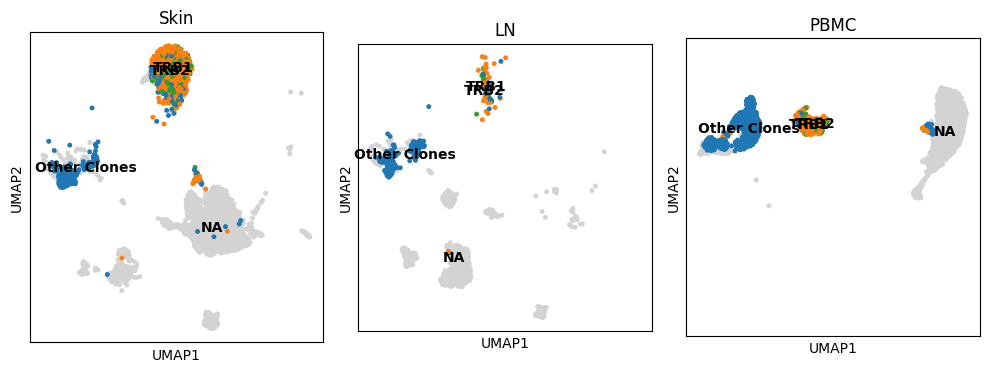

In [61]:
adata.obs['clonotype_group'] = adata.obs['clonotype_id'].apply(
    lambda x: 'TRB1' if x=="clonotype1" else
              'TRB2' if x=="clonotype2" else
              'Other Clones' if x!="NaN" else 'NaN'
)

fig, axs = plt.subplots(1, 3, figsize=(10, 20))
sc.pl.umap(adata[adata.obs["tissue"] == "skin",:], color=["clonotype_group"], legend_loc="on data", size=50, title="Skin", ax=axs[0], show=False, legend_fontsize=10)
axs[0].set_aspect('equal', adjustable='box')
sc.pl.umap(adata[adata.obs["tissue"] == "LN",:], color=["clonotype_group"], legend_loc="on data", size=50, title="LN", ax=axs[1], show=False, legend_fontsize=10)
axs[1].set_aspect('equal', adjustable='box')
sc.pl.umap(adata[adata.obs["tissue"] == "PBMC",:], color=["clonotype_group"], legend_loc="on data", size=50, title="PBMC", ax=axs[2], show=False, legend_fontsize=10)
axs[2].set_aspect('equal', adjustable='box')
# set ylim to be the same for all subplots
# axs[0].set_ylim(axs[1].get_ylim())
axs[1].set_xlim(axs[0].get_xlim())
axs[2].set_ylim(axs[0].get_ylim())
plt.tight_layout()
plt.show()

In [62]:
# Sort adata.obs['clonotype_id'].unique() by the number of cells in each clonotype
clonotype_size = adata.obs['clonotype_group'].value_counts()
clonotype_size = clonotype_size.sort_values(ascending=False)
clonotype_size

clonotype_group
Other Clones    1485
TRB1            1198
TRB2             222
Name: count, dtype: int64

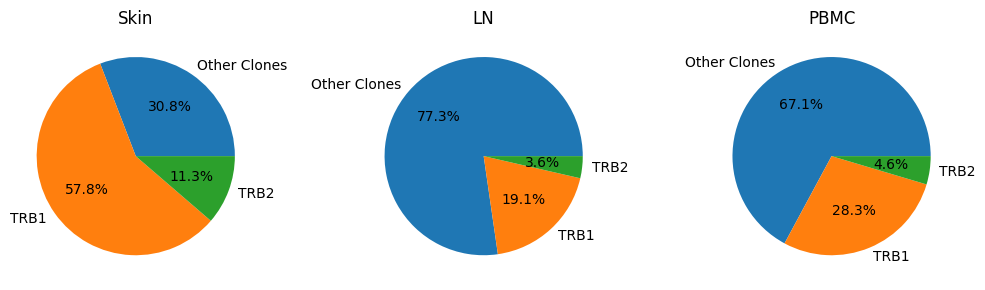

In [63]:
skin_distr = adata.obs[adata.obs['tissue'] == "skin"].groupby('clonotype_group').size().to_list()
ln_distr = adata.obs[adata.obs['tissue'] == "LN"].groupby('clonotype_group').size().to_list()
pbmc_distr = adata.obs[adata.obs['tissue'] == "PBMC"].groupby('clonotype_group').size().to_list()

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].pie(skin_distr, labels=clonotype_size.index, autopct='%1.1f%%')
axs[0].set_title("Skin")
axs[1].pie(ln_distr, labels=clonotype_size.index, autopct='%1.1f%%')
axs[1].set_title("LN")
axs[2].pie(pbmc_distr, labels=clonotype_size.index, autopct='%1.1f%%')
axs[2].set_title("PBMC")
plt.tight_layout()
plt.show()

In [64]:
adata.obs

,tissue,clonotype_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,batch,louvain,cell_type,CellTypist_labels,clonotype_group
AAACCTGCACTTACGA-1-0,skin,NaN,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564,0,4,NK/NKT Cells,DC2,NaN
AAACCTGCATGTAGTC-1-0,skin,clonotype5,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101,0,2,T Cells,Regulatory T cells,Other Clones
AAACCTGGTAATCGTC-1-0,skin,clonotype3,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723,0,2,T Cells,Regulatory T cells,Other Clones
AAACCTGGTACAGTTC-1-0,skin,NaN,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750,0,0,Monocytes,DC2,NaN
AAACCTGGTGATGCCC-1-0,skin,clonotype1,2394,7.781139,9508.0,9.159994,208.0,5.342334,2.187631,0,2,T Cells,Regulatory T cells,TRB1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTGCCC-1-2,PBMC,NaN,1352,7.210080,3310.0,8.105005,132.0,4.890349,3.987916,2,1,Macrophages,Classical monocytes,NaN
TTTGTCAGTTCCGTCT-1-2,PBMC,clonotype713,1774,7.481556,4778.0,8.471987,129.0,4.867535,2.699874,2,3,T Cells,Regulatory T cells,Other Clones
TTTGTCATCGCATGAT-1-2,PBMC,NaN,1715,7.447751,4288.0,8.363809,445.0,6.100319,10.377798,2,1,Macrophages,Classical monocytes,NaN
TTTGTCATCGGGAGTA-1-2,PBMC,NaN,1496,7.311218,3798.0,8.242493,144.0,4.976734,3.791469,2,1,Macrophages,Classical monocytes,NaN


ValueError: 'label' must be of length 'x'

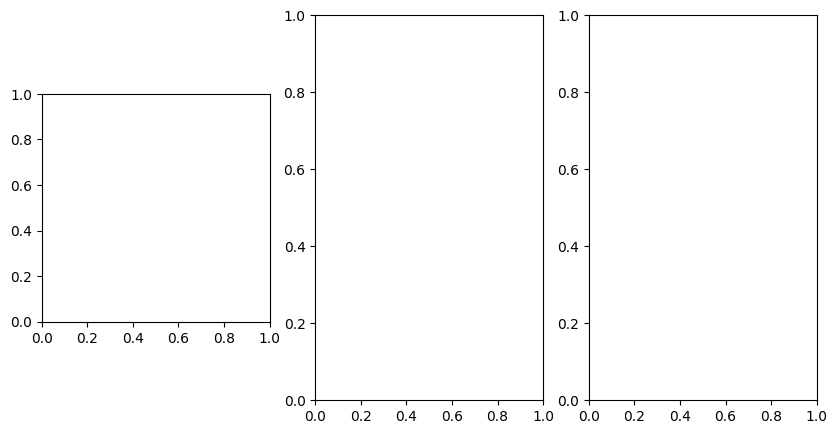

In [65]:
TC1 = ["Tem/Trm cytotoxic T cells", "Trm cytotoxic T cells"]
TC3 = ["Regulatory T cells"]
TC4 = ["Tcm/Naive cytotoxic T cells"]

cells_TC1 = adata.obs[adata.obs['CellTypist_labels'].isin(TC1)].groupby(['tissue','clonotype_group']).size().to_list()
cells_TC3 = adata.obs[adata.obs['CellTypist_labels'].isin(TC3)].groupby(['tissue','clonotype_group']).size().to_list()
cells_TC4 = adata.obs[adata.obs['CellTypist_labels'].isin(TC4)].groupby(['tissue','clonotype_group']).size().to_list()


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].pie(cells_TC1, labels=clonotype_size.index, autopct='%1.1f%%')
axs[0].set_title("TC1")
axs[1].pie(cells_TC3, labels=clonotype_size.index, autopct='%1.1f%%')
axs[1].set_title("TC3")
axs[2].pie(cells_TC4, labels=clonotype_size.index, autopct='%1.1f%%')
axs[2].set_title("TC4")
plt.tight_layout()
plt.show()

BEELINE

In [66]:
root_cells = adata.obs.index[adata.obs["CellTypist_labels"] == "Tcm/Naive helper T cells"]

In [67]:
len(root_cells)

273

In [68]:
adata

AnnData object with n_obs × n_vars = 8733 × 4771
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'louvain', 'cell_type', 'CellTypist_labels', 'clonotype_group'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    uns: 'pca', 'neighbors', 'umap', 'louvain

In [69]:
adata.uns['iroot'] = adata.obs_names.get_loc(root_cells[0])

In [70]:
sc.tl.diffmap(adata)

In [71]:
sc.tl.dpt(adata)

In [72]:
adata.obs

,tissue,clonotype_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,batch,louvain,cell_type,CellTypist_labels,clonotype_group,dpt_pseudotime
AAACCTGCACTTACGA-1-0,skin,NaN,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564,0,4,NK/NKT Cells,DC2,NaN,0.648561
AAACCTGCATGTAGTC-1-0,skin,clonotype5,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101,0,2,T Cells,Regulatory T cells,Other Clones,0.760391
AAACCTGGTAATCGTC-1-0,skin,clonotype3,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723,0,2,T Cells,Regulatory T cells,Other Clones,0.758508
AAACCTGGTACAGTTC-1-0,skin,NaN,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750,0,0,Monocytes,DC2,NaN,0.657641
AAACCTGGTGATGCCC-1-0,skin,clonotype1,2394,7.781139,9508.0,9.159994,208.0,5.342334,2.187631,0,2,T Cells,Regulatory T cells,TRB1,0.755312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTGCCC-1-2,PBMC,NaN,1352,7.210080,3310.0,8.105005,132.0,4.890349,3.987916,2,1,Macrophages,Classical monocytes,NaN,0.630981
TTTGTCAGTTCCGTCT-1-2,PBMC,clonotype713,1774,7.481556,4778.0,8.471987,129.0,4.867535,2.699874,2,3,T Cells,Regulatory T cells,Other Clones,0.736824
TTTGTCATCGCATGAT-1-2,PBMC,NaN,1715,7.447751,4288.0,8.363809,445.0,6.100319,10.377798,2,1,Macrophages,Classical monocytes,NaN,0.649064
TTTGTCATCGGGAGTA-1-2,PBMC,NaN,1496,7.311218,3798.0,8.242493,144.0,4.976734,3.791469,2,1,Macrophages,Classical monocytes,NaN,0.629067


In [73]:
adata.obs["pseudotime"] = adata.obs["dpt_pseudotime"]

In [74]:
import os

In [75]:
adata.raw.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 14375164 stored elements and shape (8733, 33538)>

In [76]:
adata.obs_names

Index(['AAACCTGCACTTACGA-1-0', 'AAACCTGCATGTAGTC-1-0', 'AAACCTGGTAATCGTC-1-0',
       'AAACCTGGTACAGTTC-1-0', 'AAACCTGGTGATGCCC-1-0', 'AAACCTGTCACCGTAA-1-0',
       'AAACCTGTCCCTGACT-1-0', 'AAACCTGTCGCGATCG-1-0', 'AAACCTGTCGGCCGAT-1-0',
       'AAACCTGTCTGTGCAA-1-0',
       ...
       'TTTGGTTTCCACGTTC-1-2', 'TTTGGTTTCGCCCTTA-1-2', 'TTTGTCAAGAGCTGCA-1-2',
       'TTTGTCAAGGCGTACA-1-2', 'TTTGTCACATTAACCG-1-2', 'TTTGTCACATTTGCCC-1-2',
       'TTTGTCAGTTCCGTCT-1-2', 'TTTGTCATCGCATGAT-1-2', 'TTTGTCATCGGGAGTA-1-2',
       'TTTGTCATCTCGGACG-1-2'],
      dtype='object', length=8733)

In [77]:
adata.raw.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

In [78]:
print(adata.raw.X.shape)
print(len(adata.obs_names))
print(len(adata.raw.var_names))

(8733, 33538)
8733
33538


In [78]:
pd.DataFrame(adata.raw.X.toarray(), index=adata.obs_names, columns=adata.raw.var_names).to_csv(os.path.join("beeline_input", "expression_matrix.csv"))
adata.obs[["CellTypist_labels"]].to_csv(os.path.join("beeline_input", "cell_labels.csv"))
adata.obs[["pseudotime"]].to_csv(os.path.join("beeline_input", "pseudotime.csv"))
adata.obs.to_csv(os.path.join("beeline_input", "metadata.csv"))

In [79]:
adata.obs['dpt_pseudotime']

AAACCTGCACTTACGA-1-0    0.648561
AAACCTGCATGTAGTC-1-0    0.760391
AAACCTGGTAATCGTC-1-0    0.758508
AAACCTGGTACAGTTC-1-0    0.657641
AAACCTGGTGATGCCC-1-0    0.755312
                          ...   
TTTGTCACATTTGCCC-1-2    0.630981
TTTGTCAGTTCCGTCT-1-2    0.736824
TTTGTCATCGCATGAT-1-2    0.649064
TTTGTCATCGGGAGTA-1-2    0.629067
TTTGTCATCTCGGACG-1-2    0.747457
Name: dpt_pseudotime, Length: 8733, dtype: float32

In [80]:
pseudotime = adata.obs['dpt_pseudotime']  # Replace 'dpt_pseudotime' with your pseudotime column
gene_expression = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
gene_names = adata.var_names

# Step 2: Compute correlation of each gene with pseudotime
correlations = []
for i in tqdm(range(gene_expression.shape[1])):
    gene_values = gene_expression[:, i]
    correlation = np.corrcoef(pseudotime, gene_values)[0, 1]
    correlations.append(correlation)

# Step 3: Create a DataFrame for gene ordering
gene_ordering = pd.DataFrame({
    'Gene': gene_names,
    'Correlation': correlations
})

# Step 4: Sort genes by correlation (descending order)
gene_ordering = gene_ordering.sort_values(by='Correlation', ascending=False)

# Step 5: Add an ordering column
gene_ordering['Ordering'] = range(1, len(gene_ordering) + 1)

# Step 6: Save to CSV
gene_ordering[['Gene', 'Ordering']].to_csv('gene_ordering.csv', index=False)
print("Gene ordering file saved as 'gene_ordering.csv'")

  0%|          | 0/4771 [00:00<?, ?it/s]

100%|██████████| 4771/4771 [00:01<00:00, 3831.47it/s]

Gene ordering file saved as 'gene_ordering.csv'


In [81]:
df = pd.read_csv('trfs.csv')
tf_list = df['Gene symbol']
tf_list.to_csv('beeline_tf_list.csv', index=False, header=False)

In [82]:
df2 = pd.read_csv('gene_ordering.csv')

GNN

In [80]:
adata

AnnData object with n_obs × n_vars = 8733 × 4771
    obs: 'tissue', 'clonotype_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'louvain', 'cell_type', 'CellTypist_labels', 'clonotype_group', 'dpt_pseudotime', 'pseudotime'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    uns: 'pca

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, EdgeConv

# Step 1: Prepare graph data
# Assume `node_features` is a [num_nodes, num_features] tensor (gene features),
# `edge_index` is a [2, num_edges] tensor (edges between genes),
# and `edge_weights` is a [num_edges] tensor (initial edge weights or labels).

data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_weights)

# Step 2: Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.fc = torch.nn.Linear(out_channels, 1)  # For edge prediction

    def forward(self, x, edge_index, edge_attr):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x  # Node embeddings

# Step 3: Define edge prediction task
class EdgePredictor(torch.nn.Module):
    def __init__(self, node_features_dim):
        super(EdgePredictor, self).__init__()
        self.fc = torch.nn.Linear(node_features_dim * 2, 1)

    def forward(self, node_emb, edge_index):
        src_nodes = node_emb[edge_index[0]]
        tgt_nodes = node_emb[edge_index[1]]
        edge_features = torch.cat([src_nodes, tgt_nodes], dim=1)
        edge_scores = torch.sigmoid(self.fc(edge_features))
        return edge_scores

# Step 4: Training loop
model = GNN(in_channels=node_features.size(1), hidden_channels=32, out_channels=16)
edge_predictor = EdgePredictor(node_features_dim=16)
optimizer = torch.optim.Adam(list(model.parameters()) + list(edge_predictor.parameters()), lr=0.01)
criterion = torch.nn.BCELoss()  # Binary Cross-Entropy Loss for edge classification

for epoch in range(100):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    node_emb = model(data.x, data.edge_index)
    edge_scores = edge_predictor(node_emb, data.edge_index)

    # Compute loss
    loss = criterion(edge_scores.squeeze(), data.edge_attr)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")
